# Pruebas del Particle Swarm Optimization
## David Omar Paredes Paredes y Abraham Maximiliano Ávalos Corrales

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import PSO               as ps
import NSGAII            as nsga2

from BetaShF import ShF
from BetaShM import ShM

In [2]:
def single_objective_func(x, alpha:float=0.5):
	return alpha*ShF(x) + (1-alpha)*ShM(x)

bounds = np.array(
	[
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04]
	]
)

In [3]:
N_TESTS = 20

best = np.zeros((N_TESTS, 15))

for i, alpha in enumerate(np.arange(0.0, 1.0, 1.0/N_TESTS)):
	pso = ps.ParticleSwarmOptimization(
		single_objective_func,
		bounds,
		function_args=(alpha,),
		pop_size=45, max_it=80, max_rep=10,
		min_vel=0.001, max_vel=0.02
	)
	print(f'Test {i+1}', end=' ')
	best[i] = pso.optimize()
	print('finished!')
# print(best[:3])

Test 1 finished!
Test 2 finished!
Test 3 finished!
Test 4 finished!
Test 5 finished!
Test 6 finished!
Test 7 finished!
Test 8 finished!
Test 9 finished!
Test 10 finished!
Test 11 finished!
Test 12 finished!
Test 13 finished!
Test 14 finished!
Test 15 finished!
Test 16 finished!
Test 17 finished!
Test 18 finished!
Test 19 finished!
Test 20 finished!


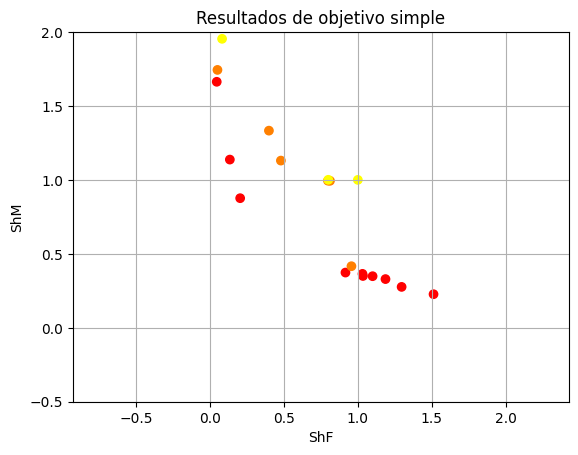

In [4]:
X = np.zeros((N_TESTS))
Y = np.zeros((N_TESTS))

for i in range(N_TESTS):
	X[i] = ShF(best[i])
	Y[i] = ShM(best[i])

lev = nsga2.NSGA2(np.column_stack([X, Y]))

fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

plt.title('Resultados de objetivo simple')
plt.axis('equal')
plt.xlabel('ShF')
plt.ylabel('ShM')

plt.scatter(X, Y, c=lev, cmap='autumn')

plt.grid(True)
plt.xlim([-0.5, 2.0])
plt.ylim([-0.5, 2.0])
plt.show()

In [5]:
pso_ntar = ps.MultiObjectiveParticleSwarmOptimization(
	[ShF, ShM], bounds, [(), ()],
	pop_size=80, max_it=200, elite_prop=0.50,
	min_vel=0.001, max_vel=0.02
)

best_ntar = np.array(pso_ntar.optimize())
print(best_ntar[:5])

[[-2.42404847e-02 -3.67254198e-02  3.57100200e-02 -7.13399932e-02
  -4.32423549e-03  3.99944837e-02 -7.29796733e-02  2.21126637e-03
   1.89721683e-02  5.31214080e-03  1.04167330e-02  2.29695589e-02
  -1.17784897e-02 -1.06761825e-03  3.92581154e-02]
 [-1.57430320e-02 -2.94214868e-02  3.76453735e-02 -6.41913906e-02
  -1.09312190e-02  3.99984593e-02 -7.13724372e-02  1.38660125e-02
   1.89229426e-02  4.32681497e-03  3.30223624e-03  2.13434944e-02
  -1.45859224e-03 -1.13518808e-03  3.94107795e-02]
 [-1.80228896e-02 -4.43908798e-02  3.56392608e-02 -7.29185307e-02
  -1.18552129e-02  3.99995778e-02 -7.60317465e-02  6.64700960e-03
   1.80197508e-02  4.09167177e-03  1.17446711e-02  2.40871405e-02
  -6.81144515e-03 -4.96813466e-03  3.90895936e-02]
 [-2.37174143e-02 -2.24589501e-02  3.89747623e-02 -5.92974572e-02
  -2.20635103e-02  3.99995505e-02 -7.87004589e-02  2.98036744e-02
   1.78892760e-02  6.51983196e-03  4.07812557e-03  1.98054647e-02
  -1.26818937e-03 -6.04604241e-05  3.95717768e-02]
 [-1

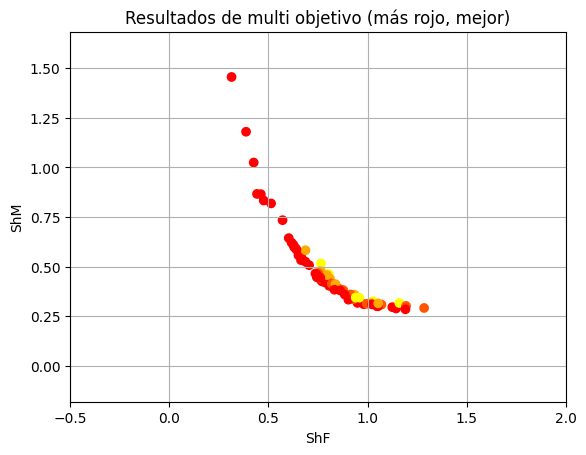

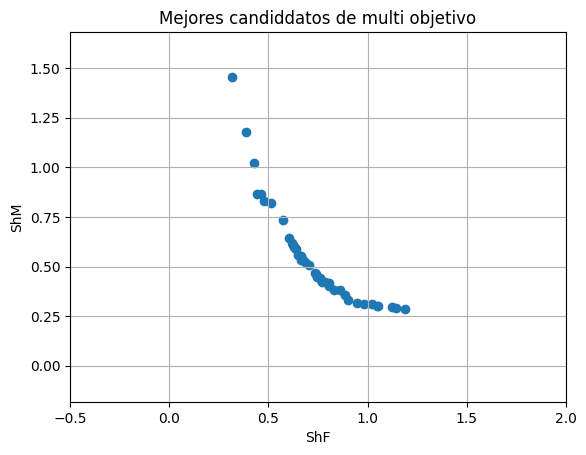

In [6]:
N_BEST = len(best_ntar)
X = np.zeros((N_BEST))
Y = np.zeros((N_BEST))

for i in range(N_BEST):
	X[i] = ShF(best_ntar[i])
	Y[i] = ShM(best_ntar[i])

plt.title('Resultados de multi objetivo (más rojo, mejor)')
plt.axis('equal')
plt.xlabel('ShF')
plt.ylabel('ShM')

plt.scatter(pso_ntar.Fit[:,0], pso_ntar.Fit[:,1], c=pso_ntar.Lev, cmap='autumn')

plt.grid(True)
plt.xlim([-0.5, 2.0])
plt.ylim([-0.5, 2.0])
plt.show()

plt.title('Mejores candiddatos de multi objetivo')
plt.axis('equal')
plt.xlabel('ShF')
plt.ylabel('ShM')

plt.scatter(X, Y)

plt.grid(True)
plt.xlim([-0.5, 2.0])
plt.ylim([-0.5, 2.0])
plt.show()